# Part II  - Exploration and Analysis of Loan Data from Prosper

### by F Njakai
[Github](https:www.github.com/brk-a) | [LinkedIn](https://www.linkedin.com/in/francis-n-6b61b2a0)

## Investigation Overview

### Questions that guide the investigation
* what are the characteristics of Prosper's loans over time?
    * how many loans have been written?
    * what is the average rate offered to borrowers?
    * what is the average amount of a loan?
* what does the average customer look like?
    * another way of saying it is: to whom does Prosper lend?
* what affects the rate offered to a customer (borrower, if you like)?
* what affects the number of investors of a loan?


## Summary of Findings

### Loans
* average amount borrowed is _c._ USD 8,337.00; the range is USD 1,000.00 to 35,000.00
    * loans of amount USD 5k, 10k, 15k, 20k and 25k have higher-than-average frequency
* average rate is _c._ 0.19%; the range is zero to 0.5%
* the number of loans disbursed changes with time
    * the number fluctuates
        * there are seemingly regular but wide fluctuations
            * fluctuations in the periods Q4 2013 to Q2 2014 inclusive are remarkably wide
        * there are little to no fluctuations starting Q4 2008 to Q3 2009, inclusive (this is exactly 12 months)
    * the number of loans issued appears to increase exponentially despite the fluctuations
    * the average number of loans issued, per annum, between 2005 and 2014 inclusive is _c._ 4.3 million
* an overwhelming majority of loans of all terms are in the range 0.05% to 0.35% borrowing rate
* majority of the tenure of the loans is 3 years or more
* the least funded loans are at 70% funding for all levels of borrowing rate

### Occupations and employment status
* an overwhelming majority of the top ten occupations are [white collar](https://www.investopedia.com/terms/w/whitecollar.asp)
* a majority of the bottom ten occupations, that are not students, are [blue collar](https://www.investopedia.com/terms/b/bluecollar.asp); half of the occupations in the bottom ten are students
* Prosper lends to unemployed applicants

### Income level
* Prosper appears to prefer to lend to high income earners at less-than-average rates
    * the region of high income and low rates is quite dense
    * an overwhelming majority of loans are issued to those whose income level is above USD 25,000.00 _p.a._
        * the top 2 groups account for 55.8% of loans issued 
        * the top 4 groups account for 85.4% of loans issued

### Home ownership status
* there is an almost even split between those that own a home and those that do not; 50.4% of borrowers own a home

### Location of borrower
* a majority of the states with the least borrowers are from the so-called "[fly-over country](https://en.wikipedia.org/wiki/Flyover_country)"
* all of the states with the most borrowers are on either [seaboard](https://www.oxfordlearnersdictionaries.com/us/definition/english/seaboard)

### Factors that affect the nominal borrowing rate
* there is weak, positive correlation between `BorrowerRate` and `Term` -> _c._ 0.02
* there is weak, negative correlation between
    * `BorrowerRate` and `StatedMonthlyIncome` -> _c._ -0.09
    * `BorrowerRate` and `EmploymentStatusDuration` -> _c._ -0.02
* there is strong, positive correlation between
    * `BorrowerRate` and `BorrowerAPR` -> _c._ 0.99
* none of the variables of interest have a strong, negative correlation

### Factors that affect the number of investors
* none of the variables of interest have a weak, positive correlation
* there is weak, negative correlation between
    * `Investors` and `BorrowerRate` -> _c._ -0.27
    * `Investors` and `PercentFunded` -> _c._ -0.05
* none of the variables of interest have a strong, positive correlation
* none of the variables of interest have a strong, negative correlation


## Overview of dataset

### Overall
* 113,937 observations
* 81 variables
    * 3 of type `bool`
    * 50 of type `float`
    * 11 of type `int`
    * 17 of type `str`

### Missing and null values
* some observations in the data set have missing or null values
    * case(s) in point
        * 100,596 under variable `GroupKey`
        * 96,985 under variable `LoanFirstDefaultedCycleNumber`

### Duplicated observations
* the data set has no duplicated observations

### Multiple values for a variable
* observations in the data set have 1 value per variable 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
from contextlib import suppress

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosper_loans_data.csv', sep=',')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,PercentFunded,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,1.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,1.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,1.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,1.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,1.0,20


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualisation 1

#### Q: how does the number of loans written behave over the years?

* does it change at all?
    * if yes, what is the direction of change?
    
#### A: the number of loans written changes with time

* how does it change?
    * the number fluctuates
        * there are seemingly regular but wide fluctuations according to the time series
            * fluctuations in the periods Q4 2013 to Q2 2014 inclusive are remarkably wide
        * there are little to no fluctuations starting Q4 2008 to Q3 2009, inclusive (this is exactly 12 months)
        * the highest number of loans issued, in a year, before 2011 were issued in 2008 according to the bar chart

* there appears to be an exponential trend
    * trend shows that number of loans issued appears to increase exponentially despite the fluctuations

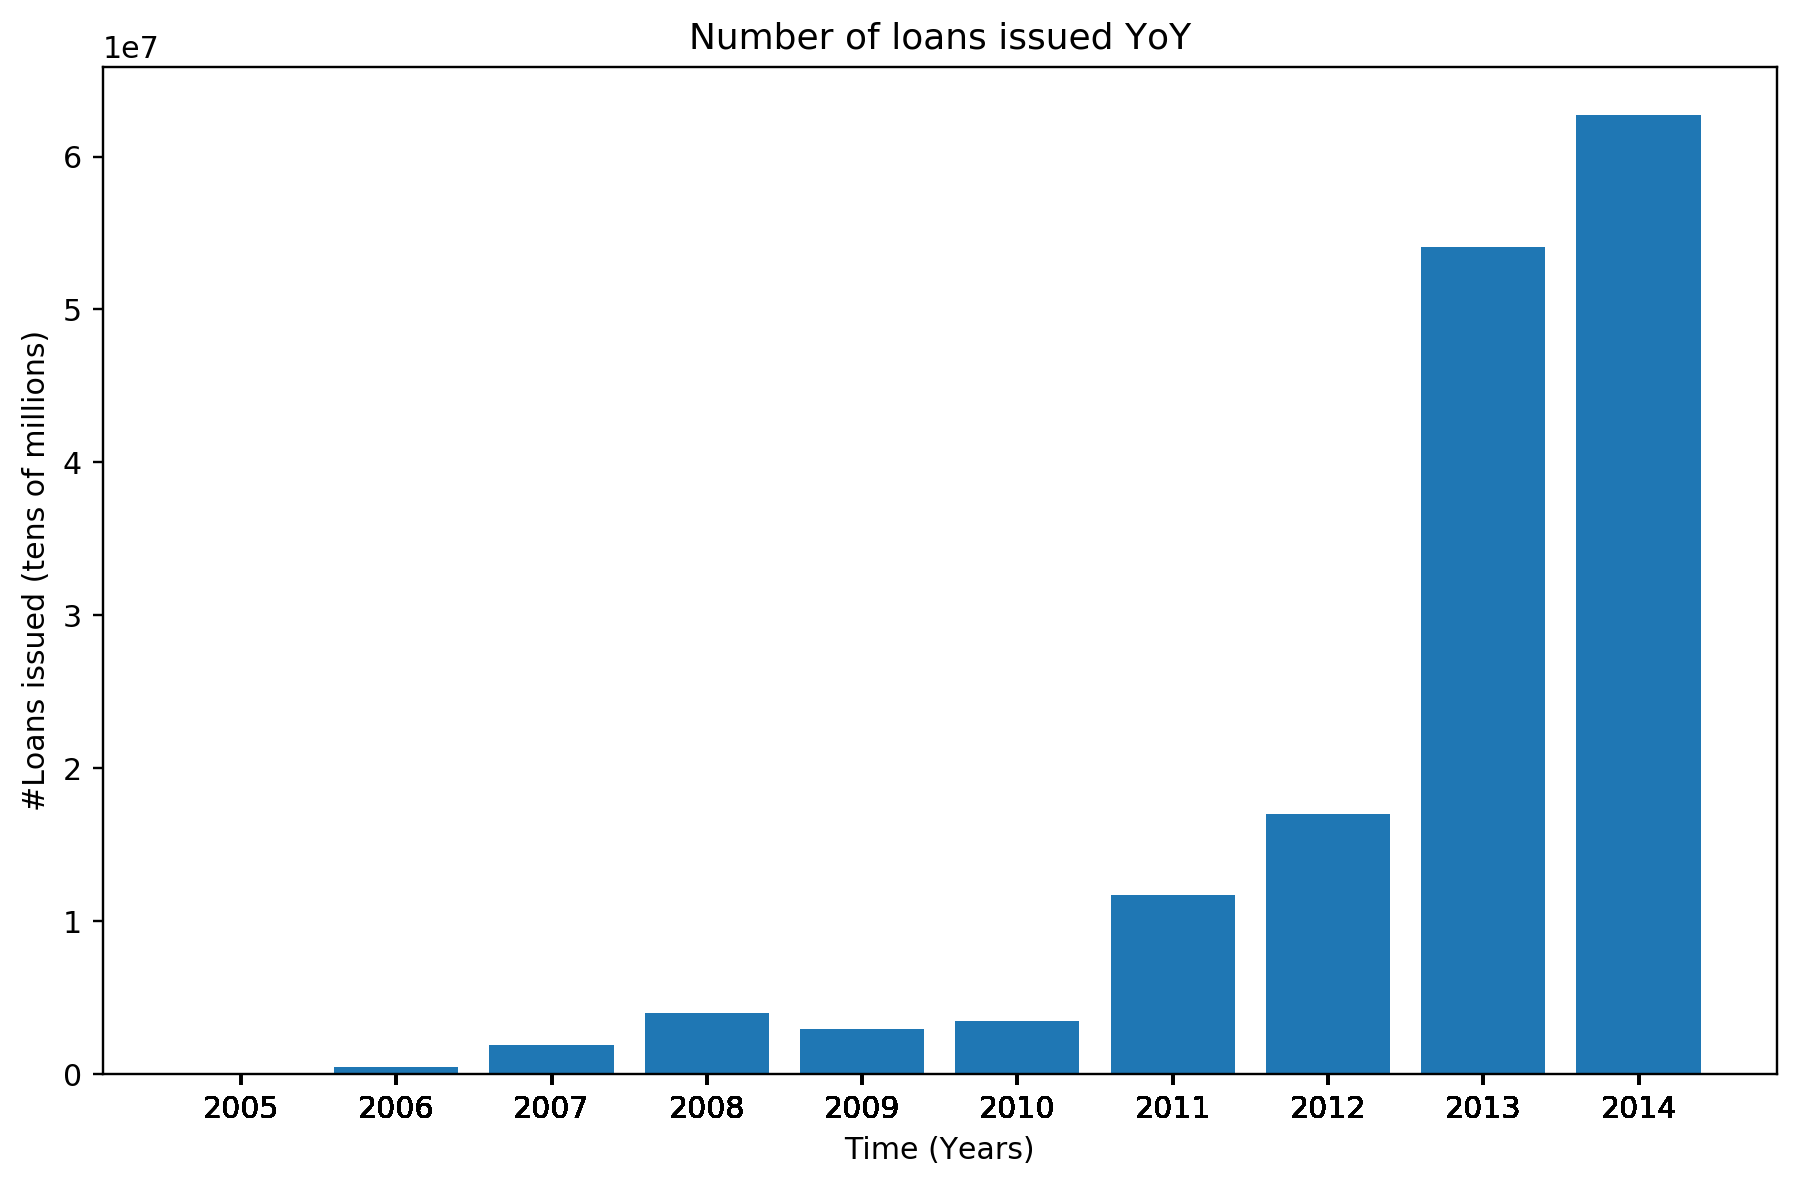

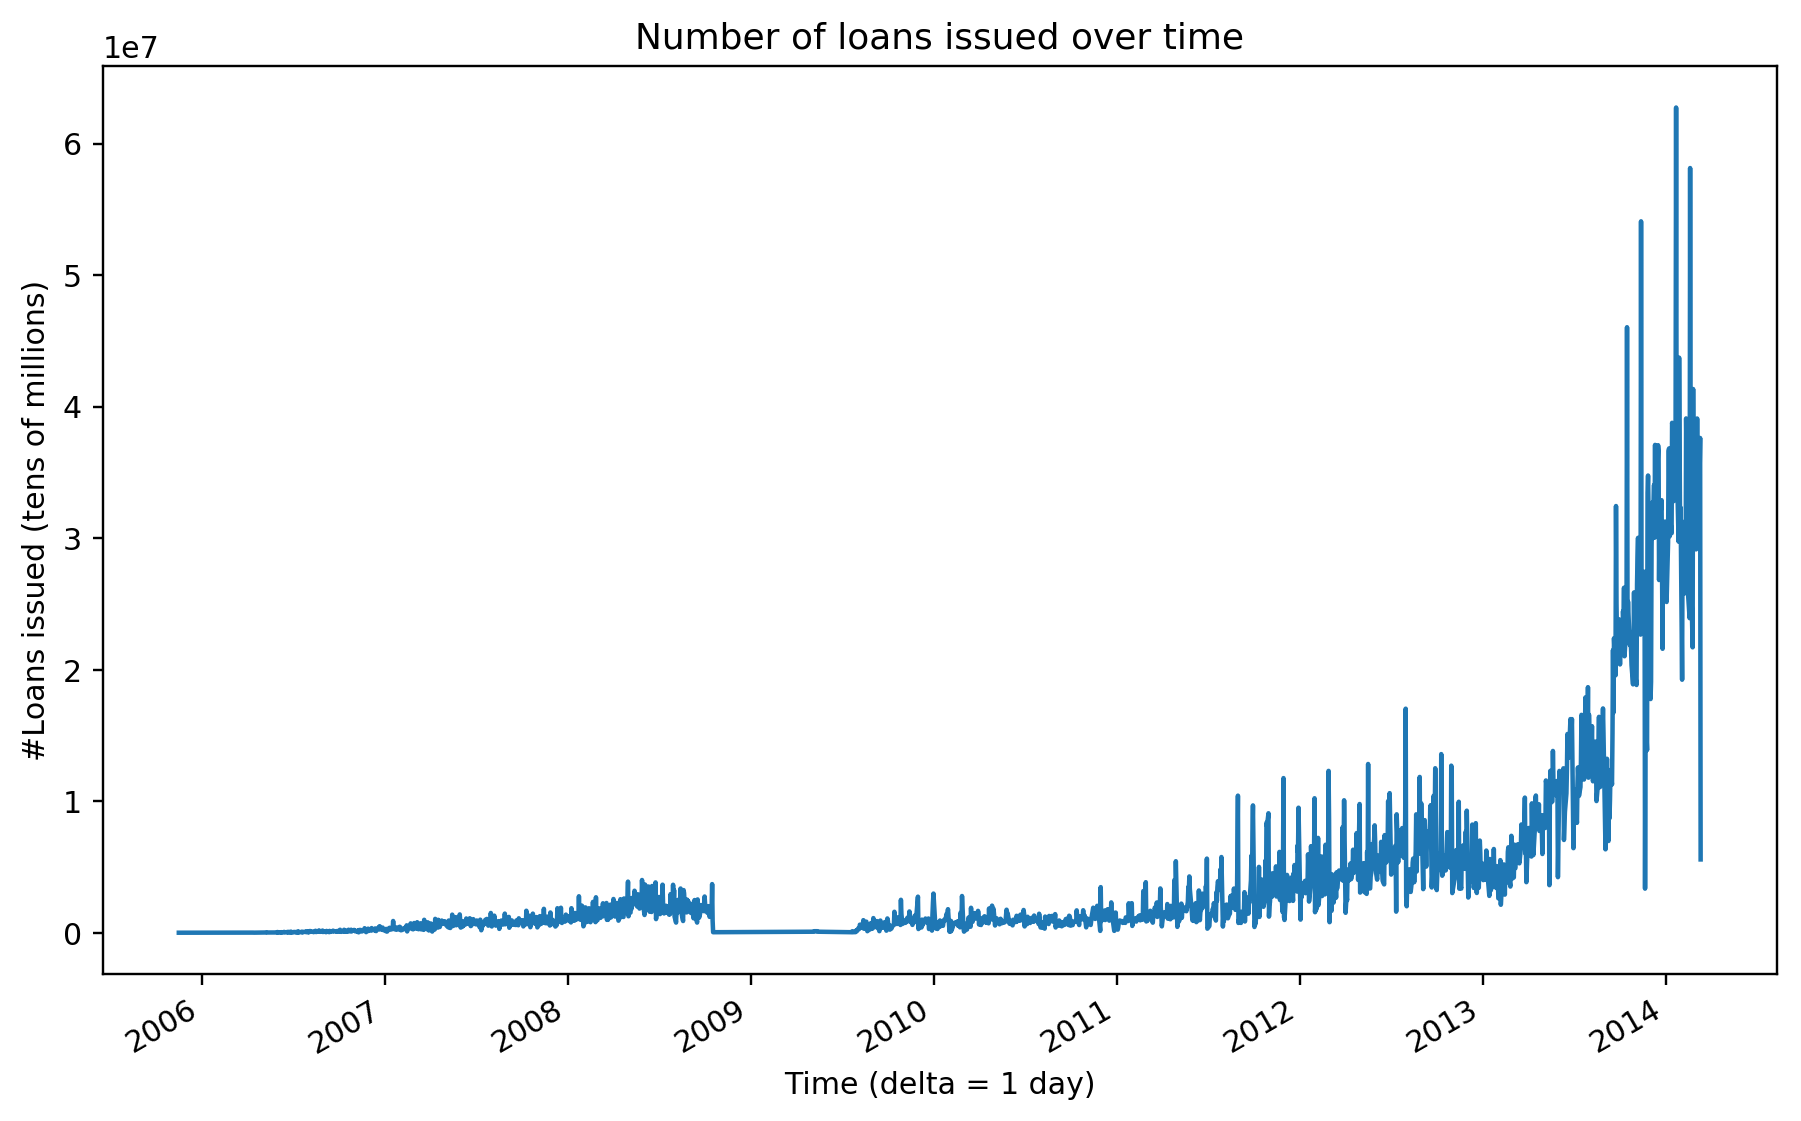

In [14]:
#default blue
default_blue = sns.color_palette('tab10')[0]

#default orange, if required
default_orange = sns.color_palette('tab10')[1]


#default palette
default_palette = sns.color_palette('tab10')

#template no. 2

'''
simple function to create `Figure` object
using matplotlib that contains an x-lab,
y-lab and title.

"Father Figure", if you like :)

3 params, all type `str`:
x_lab, y_lab and title

Please make sure all args passed to the 
function are type `str`

return: None
'''
def create_fig(x_lab: str, y_lab: str, title: str):
    """create_fig function"""
    try:
        #fig size
        plt.figure(figsize=(10, 6.18), dpi=216, frameon=False, clear=True)
        #x-axis name
        plt.xlabel(x_lab)
        #y-axis name 
        plt.ylabel(y_lab)
        #title
        plt.title(title)
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise


#template no. 3

'''
simple function to create `Figure` object
using matplotlib for sub-plots.

"Father Figure" for subplots :)

2 params, type int; the number of sub-plots.
@n_row -> #rows
@n_col -> #cols

return: fig and ax objects
'''
def create_sub(n_row: int=1, n_col: int=1):
    """create_sub function"""
    try:
        #fig, ax and figsize
        fig, ax = plt.subplots(n_row, n_col, figsize=(10, 6.18), dpi=216)
        fig.tight_layout(pad=10.0)
        return fig, ax
    except ModuleNotFoundError:
        print(f'Please `import matplotlib.pyplot as plt` and try again')
    except:
        print(f'Failed to create template')
        raise

#group data and find sum

'''
Function to calculate sum of
grouped data

Takes in 2 args: var_1 and var_2

Both args must be columns of a pandas DF

return: sum  of grouped data
'''

def group_sum(var_1, var_2):
    """ function group_sum"""
    if var_1 and var_2:
        sum_gp_data = df.groupby(var_1)[var_2].sum()
        return sum_gp_data
    else:
        print(f'Check that both arguments are columns of s pandas DF and try again')
        
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)

#sum of loans by year
sum_loan_time = group_sum('LoanOriginationDate','LoanNumber')

#number of loans issued
y = [sum_loan_time.values[i] for i in range(len(sum_loan_time))]

#time (years)
x = [sum_loan_time.index[i].year for i in range(len(sum_loan_time))]

#visualise said timelines
#create plot
create_fig('Time (Years)', '#Loans issued (tens of millions)', 'Number of loans issued YoY')
plt.bar(x, y, tick_label=x, color=default_blue)
plt.yticks(np.arange(0, 65000000, step=10000000));

#time series plot for `sum_loan_plot` by the day
create_fig('Time (Days)', '#Loans issued (tens of millions)', 'Number of loans issued over time')
sum_loan_time.plot(kind='line',color=default_blue)
plt.xlabel('Time (delta = 1 day)');



#### Q: what, really, happens:
* before 2007
* during Q4 2008 to Q3 2009, inclusive

#### A: nothing, for the most part
* what happens before 2007...
   * activity begins at the beginning of Q2 2007
   * little activity; less than a million loans, in total, are issued

* what happens during Q4 2008 to Q3 2009, inclusive...
   * activity ceases during the middle of Q4 2008
   * said activity stays at zero until late Q2 2009
   * little activity; less than 15 million loans, in total, are issued
   
#### conclusion
* the first few years had little to no activity
* Prosper is growing its loan book in an exponential-like manner
* Prosper's ability to grow its loan book are affected directly by events in the financial system 

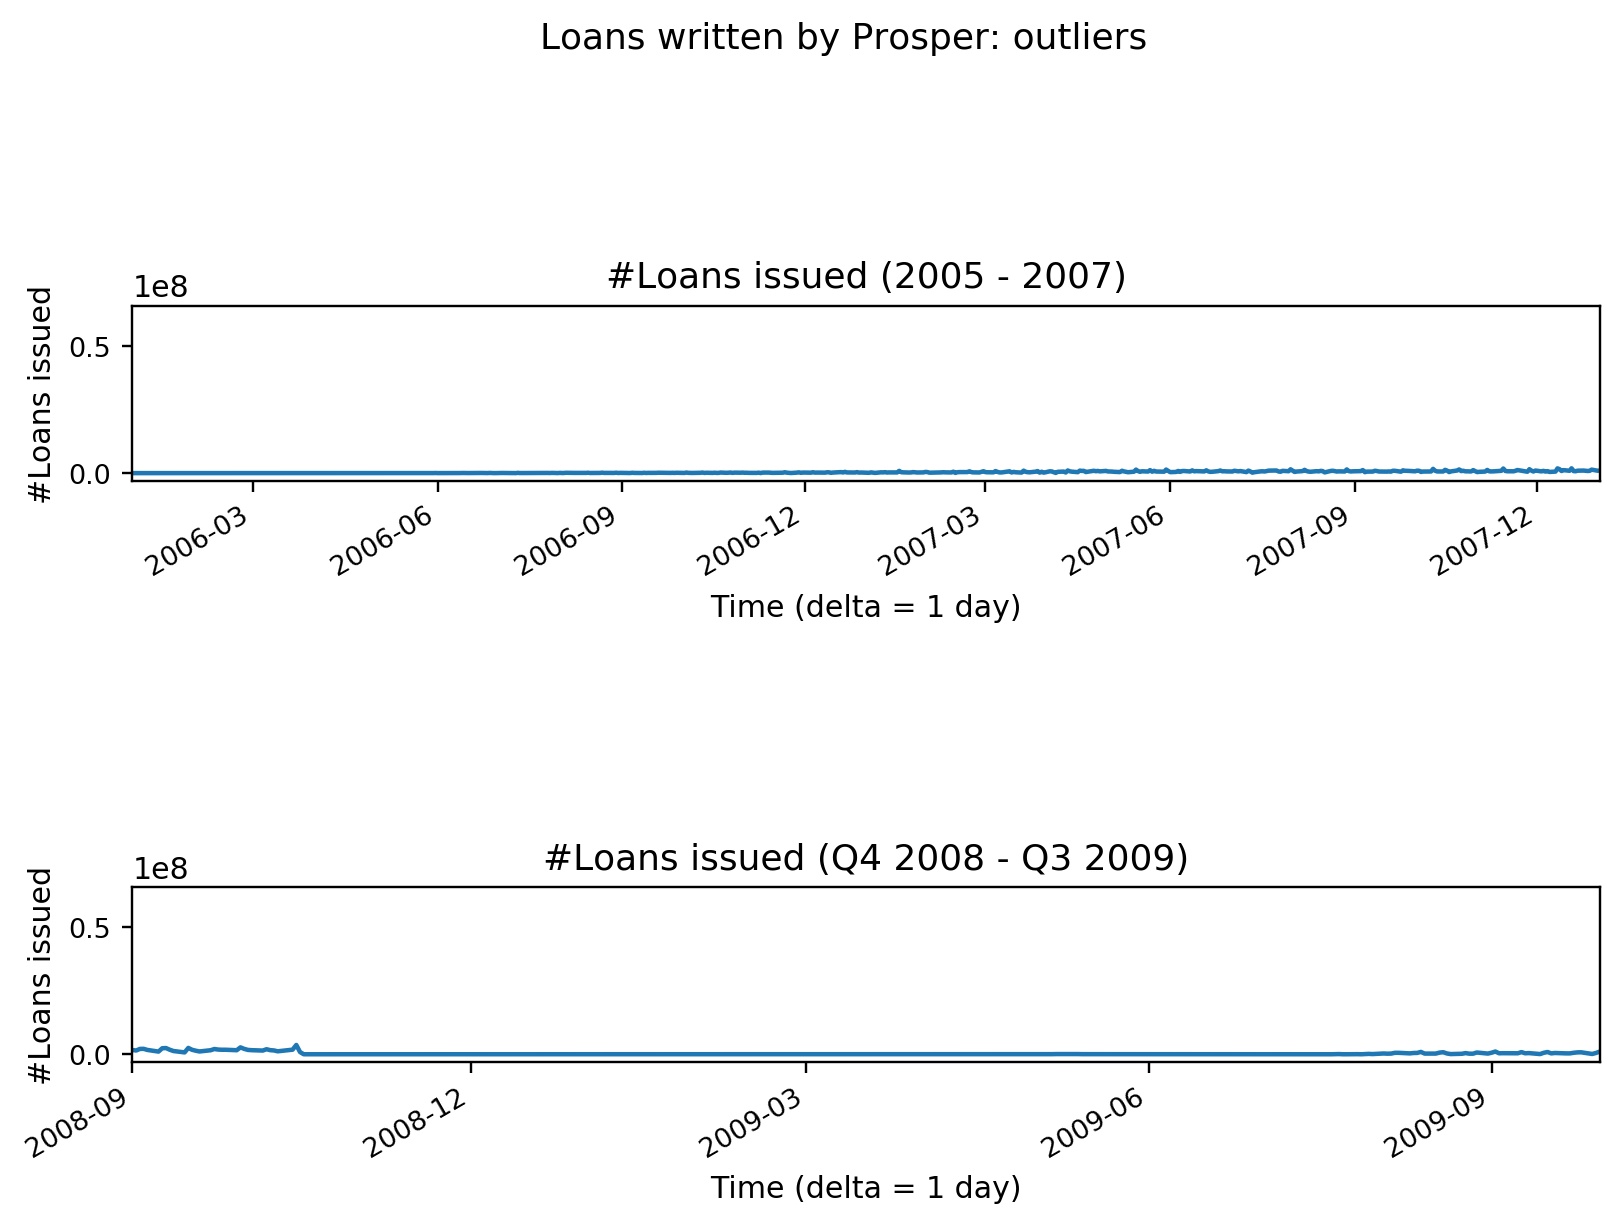

In [15]:
create_sub(2, 1)
plt.suptitle('Loans written by Prosper: outliers')

#sub-plot #3: loans issued pre-2007
plt.subplot(2, 1, 1)
sum_loan_time.plot(kind='line',color=default_blue, xlim=['2005-12-31','2008-01-01'], title='#Loans issued (2005 - 2007)', fontsize=9)
plt.xlabel('Time (delta = 1 day)')
plt.ylabel('#Loans issued');

#sub-plot #4: loans issued during Q4 2008 to Q3 2009
plt.subplot(2, 1, 2)
sum_loan_time.plot(kind='line',color=default_blue, xlim=['2008-09-01','2009-09-30'], title='#Loans issued (Q4 2008 - Q3 2009)', fontsize=9)
plt.xlabel('Time (delta = 1 day)')
plt.xticks(['2008-09', '2008-12', '2009-03', '2009-06', '2009-09'])
plt.ylabel('#Loans issued');

## Visualisation 2

#### Q: what is the correlation between the rate, term, stated monthly income and employment status duration of a loan?

#### A: a mix of weak positive and negative correlations, mostly
* there is weak, positive correlation between
    * `Term` and `BorrowerRate` -> _c._ 0.02
    * `Term` and `StatedMonthlyIncome` -> _c._ 0.03
    * `Term` and `EmploymentStatusDuration` -> _c._ 0.09
    * `StatedMonthlyIncome` and `EmploymentStatusDuration` -> _c._ 0.07
* there is weak, negative correlation between
    * `BorrowerRate` and `StatedMonthlyIncome` -> _c._ -0.09
    * `BorrowerRate` and `EmploymentStatusDuration` -> _c._ -0.02
    * `Term` and `BorrowerAPR` -> _c._ -0.02
    * `StatedMonthlyIncome` and `BorrowerAPR` -> _c._ -0.08
    * `EmploymentStatusDuration` and `BorrowerAPR` -> _c._ -0.01
* none of the variables of interest have a strong, negative correlation

#### and then there's this...
* strong, positive correlation between
    * `BorrowerAPR` and `BorrowerRate` -> _c._ 0.99

#### conclusion
* the factors investigated do not affect the borrowing rate significantly; a more extensive and rigorous investigation must be done

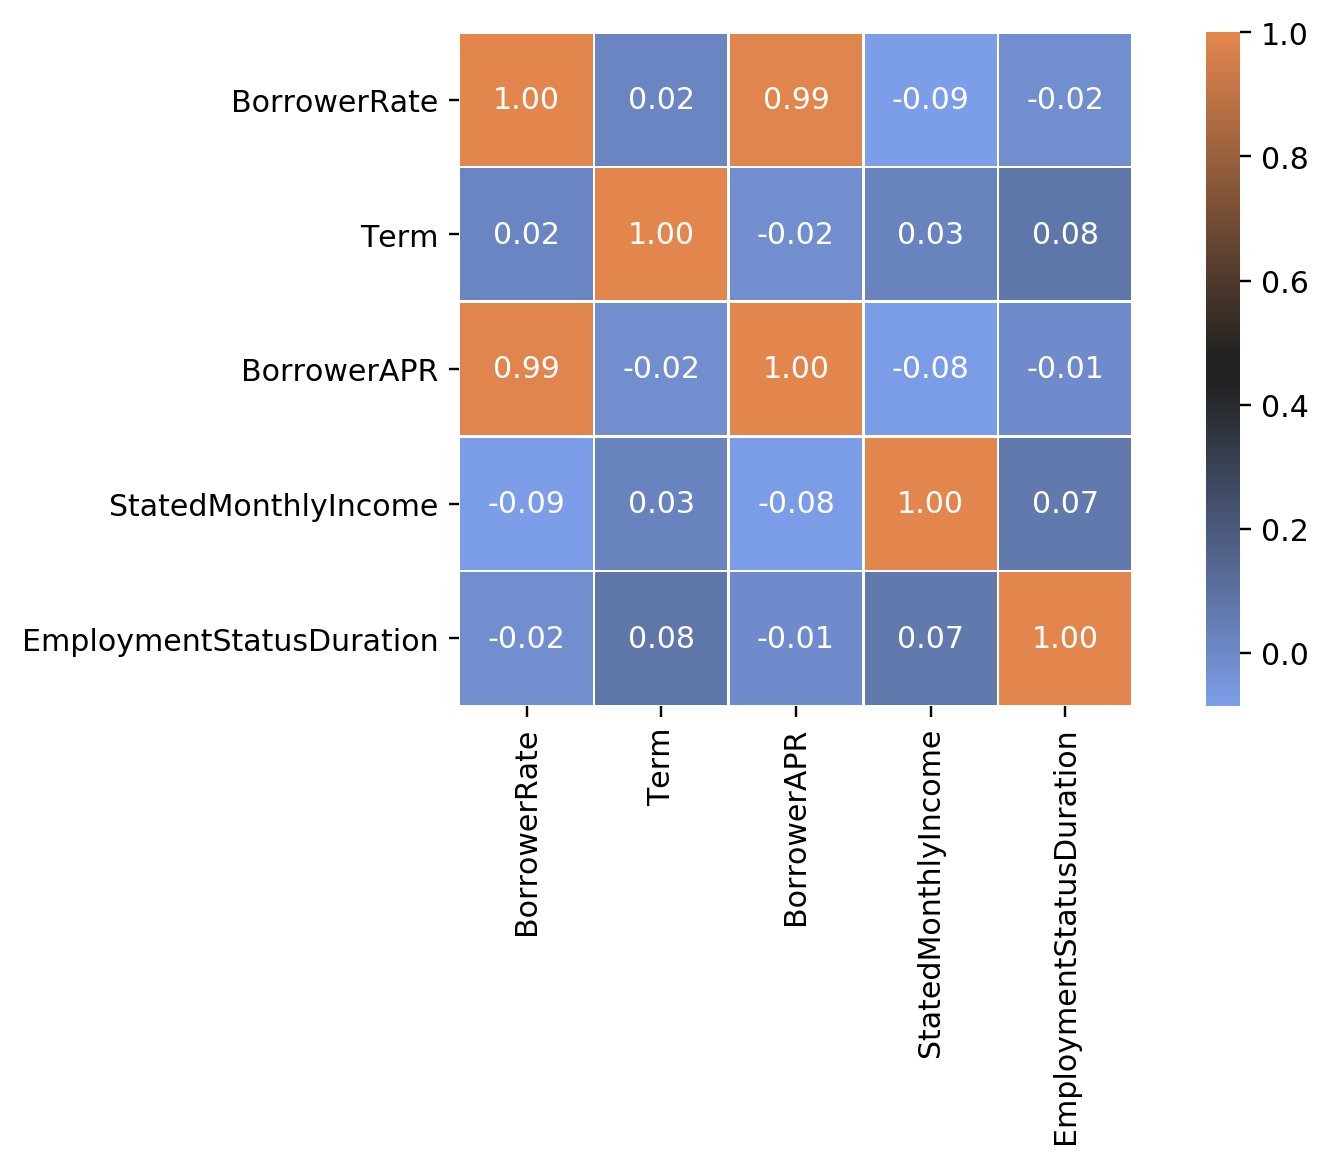

In [17]:
corr_df = pd.DataFrame([df.BorrowerRate, df.Term, df.BorrowerAPR, df.StatedMonthlyIncome, df.EmploymentStatusDuration]).transpose()
corr_df = corr_df[pd.notnull(corr_df['EmploymentStatusDuration'])]

#sub-plots
fig, ax = create_sub()

#correlation matrix
corr = corr_df.corr()

#plot
with suppress(DeprecationWarning, ImportWarning):
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(255, 32, l=65, center="dark", as_cmap=True), square=True, ax=ax, annot=True, fmt="0.2f", linewidths=.5);

In [18]:
corr

,BorrowerRate,Term,BorrowerAPR,StatedMonthlyIncome,EmploymentStatusDuration
BorrowerRate,1.000000,0.019477,0.991063,-0.085369,-0.019907
Term,0.019477,1.000000,-0.019929,0.025230,0.082476
BorrowerAPR,0.991063,-0.019929,1.000000,-0.080524,-0.008589
StatedMonthlyIncome,-0.085369,0.025230,-0.080524,1.000000,0.069830
EmploymentStatusDuration,-0.019907,0.082476,-0.008589,0.069830,1.000000


## Visualisation 3

#### Q: what is the correlation between the rate,  proportion funded and number of investors of a loan?

#### A: weak positive correlation
* none of the variables of interest have a weak, positive correlation
* there is weak, negative correlation between
    * `BorrowerRate` and `PercentFunded` -> _c._ -0.03
    * `BorrowerRate` and `Investors` -> _c._ -0.27
    * `PercentFunded` and `Investors` -> _c._ -0.05
* none of the variables of interest have a strong, positive correlation
* none of the variables of interest have a strong, negative correlation

#### conclusion
* the factors investigated do not affect the proportion of loans invested in significantly; a more extensive and rigorous investigation must be done

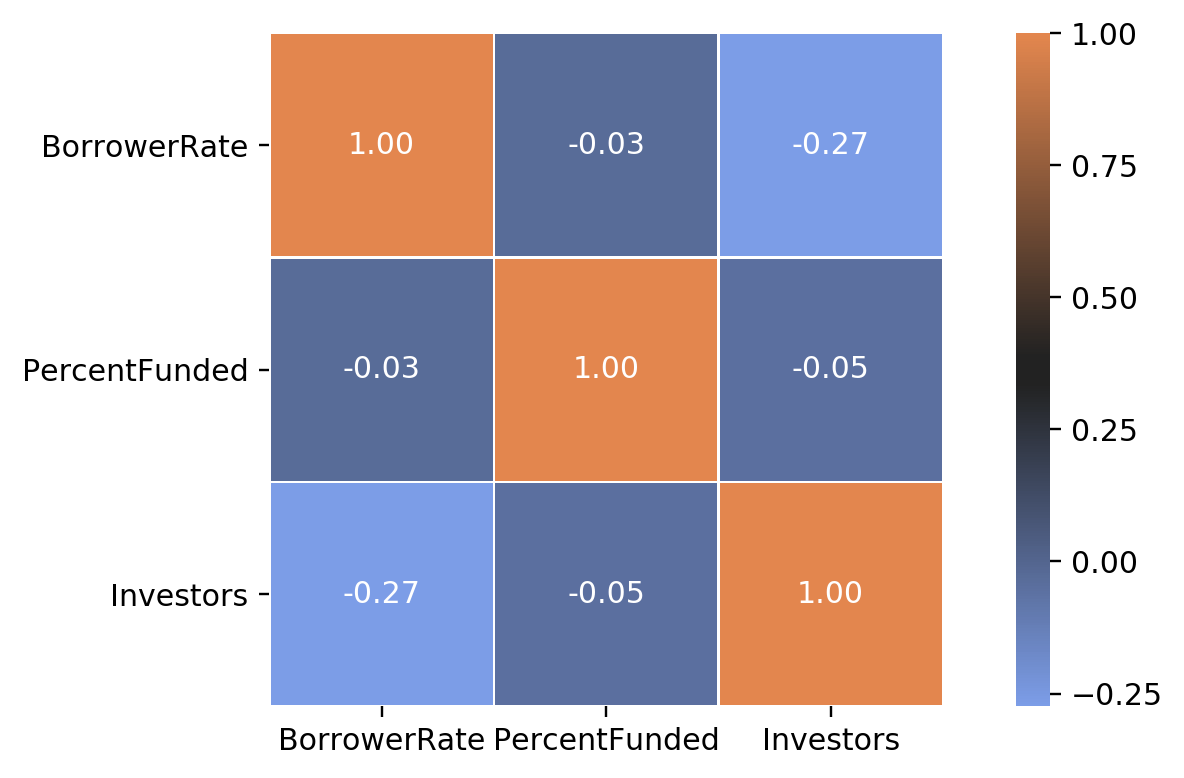

In [19]:
corr_df = pd.DataFrame([df.BorrowerRate, df.PercentFunded, df.Investors]).transpose()
#sub-plots
fig, ax = create_sub()

#correlation matrix
corr = corr_df.corr()

#plot
with suppress(DeprecationWarning, ImportWarning):
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(255, 32, l=65, center="dark", as_cmap=True), square=True, ax=ax, annot=True, fmt="0.2f", linewidths=.5);

In [20]:
corr

,BorrowerRate,PercentFunded,Investors
BorrowerRate,1.000000,-0.029025,-0.274217
PercentFunded,-0.029025,1.000000,-0.049716
Investors,-0.274217,-0.049716,1.000000


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [21]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_2_slide_deck>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_2_slide_deck: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


In [22]:


from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_2_slide_deck.html'])



255